* Importamos las **librerias** necesarias para traer la data de Wikipedia y transformarla en un DataFrame

In [1]:
import urllib.request # Biblioteca para abrir URL y crear requests
from pprint import pprint # Estructuras de datos de python pretty-print
from html_table_parser import HTMLTableParser # para analizar todas las tablas presentes en el sitio web
import pandas as pd 

* Con la función **url_get_contents** hacemos la solicitud y lectura del contenido de la url. 

In [2]:
def url_get_contents(url):
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)
    return (f.read())

* Se ejecuta la funcion con nuestra url como parametro y con la libreria HTMLTableParser se recolectan las tablas  

In [3]:
xhtml = url_get_contents('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies').decode('utf-8')
p = HTMLTableParser()
p.feed(xhtml)

* Se toma la primera tabla, que es la relacionada con el **SP500**

In [4]:
pprint(p.tables[0])

[['Symbol',
  'Security',
  'SEC filings',
  'GICS Sector',
  'GICS Sub-Industry',
  'Headquarters Location',
  'Date first added',
  'CIK',
  'Founded'],
 ['MMM',
  '3M',
  'reports',
  'Industrials',
  'Industrial Conglomerates',
  'Saint Paul, Minnesota',
  '1976-08-09',
  '0000066740',
  '1902'],
 ['AOS',
  'A. O. Smith',
  'reports',
  'Industrials',
  'Building Products',
  'Milwaukee, Wisconsin',
  '2017-07-26',
  '0000091142',
  '1916'],
 ['ABT',
  'Abbott',
  'reports',
  'Health Care',
  'Health Care Equipment',
  'North Chicago, Illinois',
  '1964-03-31',
  '0000001800',
  '1888'],
 ['ABBV',
  'AbbVie',
  'reports',
  'Health Care',
  'Pharmaceuticals',
  'North Chicago, Illinois',
  '2012-12-31',
  '0001551152',
  '2013 (1888)'],
 ['ABMD',
  'Abiomed',
  'reports',
  'Health Care',
  'Health Care Equipment',
  'Danvers, Massachusetts',
  '2018-05-31',
  '0000815094',
  '1981'],
 ['ACN',
  'Accenture',
  'reports',
  'Information Technology',
  'IT Consulting Other Services'

* Se transforma a **DataFrame**

In [15]:
df_wiki = pd.DataFrame(p.tables[0])
header_row = df_wiki.iloc[0]
df_wiki = pd.DataFrame(df_wiki.values[1:], columns=header_row)
df_wiki.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,0000066740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981


* Transformaciónes relacionadas con los **Tickers**

In [16]:
df_wiki['Symbol'] = df_wiki.apply(lambda row: row['Symbol'].replace('.', '-'), axis=1)

* Las listas con el contenido de **Tickers** y **Sector**, nos serviran más adelante

In [17]:
symbol_list = df_wiki.Symbol.to_list()
print(symbol_list)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', '

In [18]:
sector_list = df_wiki['GICS Sector'].to_list()
print(sector_list)

['Industrials', 'Industrials', 'Health Care', 'Health Care', 'Health Care', 'Information Technology', 'Communication Services', 'Consumer Staples', 'Information Technology', 'Information Technology', 'Consumer Discretionary', 'Utilities', 'Financials', 'Health Care', 'Materials', 'Information Technology', 'Industrials', 'Materials', 'Real Estate', 'Health Care', 'Industrials', 'Utilities', 'Financials', 'Communication Services', 'Communication Services', 'Consumer Staples', 'Consumer Discretionary', 'Materials', 'Information Technology', 'Utilities', 'Industrials', 'Utilities', 'Financials', 'Financials', 'Real Estate', 'Utilities', 'Financials', 'Health Care', 'Industrials', 'Health Care', 'Information Technology', 'Information Technology', 'Information Technology', 'Health Care', 'Financials', 'Energy', 'Information Technology', 'Information Technology', 'Consumer Discretionary', 'Information Technology', 'Financials', 'Financials', 'Communication Services', 'Utilities', 'Information

In [19]:
len(symbol_list)

503

* Importamos la libreria que hará el trabajo relacionado con la comunicación con la API de **Yahoo Finance**

In [20]:
import yfinance as yf

* Creamos un DataFrame a partir de un diccionario que servira para iterar la descarga de información

In [23]:
index = [i for i in range(1, len(symbol_list)+1)]
df_symbol = pd.DataFrame.from_dict({'id_symbol':index, 'symbol':symbol_list})

In [24]:
df_symbol.head()

,id_symbol,symbol
0,1,MMM
1,2,AOS
2,3,ABT
3,4,ABBV
4,5,ABMD


* Generamos la descarga iterando a partir del DataFrame con los Tickers

In [25]:
df_list = list()
for ticker in list(df_symbol.symbol):
    data = yf.download(ticker, group_by='Ticker', start='2000-01-01', end='2021-12-31')
    data['Ticker'] = ticker
    df_list.append(data)

df_sp500 = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

In [27]:
df_sp500 = pd.read_csv('DataPI.csv', delimiter=',')

In [248]:
df_sp500.reset_index(inplace=True)

In [28]:
len(df_sp500.index)

2478162

In [29]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478162 entries, 0 to 2478161
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Symbol     object 
 1   Date       object 
 2   Open       float64
 3   High       float64
 4   Low        float64
 5   Close      float64
 6   Adj Close  float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 151.3+ MB


**1. Cual es el mejor día para invertir teniendo en cuenta el retorno de los movimiento gap**

1.1. Generamos la columna día para filtrar la información necesaria  

In [30]:
df_sp500['date_day'] = pd.to_datetime(df_sp500['Date']).dt.day_name()

In [31]:
df_sp500.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,date_day
0,MMM,2000-01-03,48.03125,48.25000,47.03125,47.1875,26.434860,2173400.0,Monday
1,MMM,2000-01-04,46.43750,47.40625,45.31250,45.3125,25.384466,2713800.0,Tuesday
2,MMM,2000-01-05,45.56250,48.12500,45.56250,46.6250,26.119738,3699400.0,Wednesday
3,MMM,2000-01-06,47.15625,51.25000,47.15625,50.3750,28.220531,5975800.0,Thursday
4,MMM,2000-01-07,50.56250,51.90625,49.96875,51.3750,28.780716,4101200.0,Friday


1.2. Creamos la columna correspondiente a los **retornos GAPs**

In [32]:
import numpy as np

In [37]:
retornos_gaps = np.log(df_sp500.Open/(df_sp500.Close.shift(1))).fillna(0)
df_sp500.loc[df_sp500['Symbol'] == df_sp500['Symbol'].shift(1),'retornos_gaps'] = retornos_gaps

1.3. A partir de la columna generada se crea un nuevo **DataFrame con la información agrupada** por el día de la semana en primera instancia y por el Ticker en segunda.

In [180]:
df_dia_gap = df_sp500[['date_day', 'Symbol', 'retornos_gaps']].groupby([df_sp500['date_day'], df_sp500['Symbol']]).sum()
df_dia_gap.reset_index(inplace=True)
df_dia_gap.head()

,date_day,Symbol,retornos_gaps
0,Friday,A,-0.274303
1,Friday,AAL,0.600088
2,Friday,AAP,0.443362
3,Friday,AAPL,-0.588972
4,Friday,ABBV,0.329285


In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

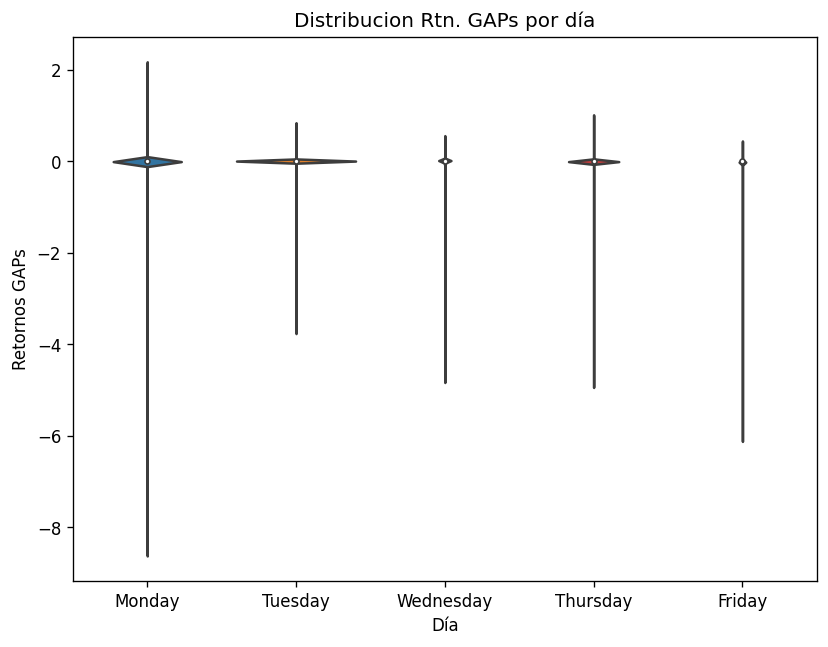

In [318]:
from matplotlib.pyplot import title


plt.figure(figsize=(8, 6), dpi=120)
sns.violinplot(x=df_sp500.date_day, y=df_sp500.retornos_gaps, data=df_sp500)
plt.title('Distribucion Rtn. GAPs por día')
plt.xlabel('Día')
plt.ylabel('Retornos GAPs')
plt.show()

1.4. Con la información filtrada se genera una primera visualización en función de **entender la naturaleza del dato**

In [177]:
ply.boxplot_frame(data_frame=df_dia_gap, x=df_dia_gap.date_day, y=df_dia_gap.retornos_gaps, title='Distribucion Rtn. GAPs por día')

* Conclusiones:

    - Este indicador marca el valor de una brecha en la cifra de apertura respecto a la del cierre del día anterior, por tanto, *valores positivos indican que en determinados días (y en función del día anterior al mismo) se obtienen ganancias* fruto de esa brecha, y datos negativos todo lo contrario. Entonces, vemos como en un día lunes se repite la tendencia a tener brechas negativas (perdidas) teniendo en cuenta todo el SP500, **por tanto el día viernes seria el peor para invertir.**
    
    - Por otro lado, el resto de días maneja una concentración de datos bastante similar, por tanto cualquier conclusión alrededor del mejor día para invertir puede fácilmente caer en la ambigüedad, sin embargo, gráficamente se puede ver como el día martes concentra datos de retorno en mejores cifras respecto a los demás días, es decir, que por mínimas diferencias, **el día lunes sería la mejor opción para invertir.**
     

In [182]:
import plotly.express as px

* Extra: Otra visualizacion esta vez del resultado de la sumatoria de los retornos, da una perspectiva de interactuar con todos los datos.

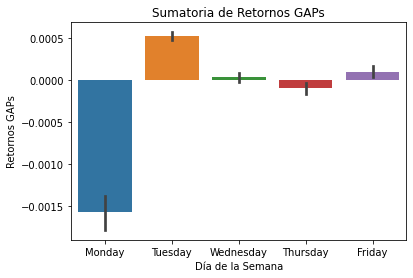

In [319]:
# plt.figure(figsize= (10, 10))
sns.barplot(x='date_day', y="retornos_gaps", data=df_sp500)
plt.title('Sumatoria de Retornos GAPs')
plt.xlabel('Día de la Semana')
plt.ylabel('Retornos GAPs')
plt.show()

In [40]:
df_sp500.head(10)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,date_day,retornos_gaps
0,MMM,2000-01-03,48.03125,48.25000,47.03125,47.18750,26.434860,2173400.0,Monday,0.000000
1,MMM,2000-01-04,46.43750,47.40625,45.31250,45.31250,25.384466,2713800.0,Tuesday,-0.016022
2,MMM,2000-01-05,45.56250,48.12500,45.56250,46.62500,26.119738,3699400.0,Wednesday,0.005502
3,MMM,2000-01-06,47.15625,51.25000,47.15625,50.37500,28.220531,5975800.0,Thursday,0.011330
4,MMM,2000-01-07,50.56250,51.90625,49.96875,51.37500,28.780716,4101200.0,Friday,0.003715
5,MMM,2000-01-10,50.21875,51.75000,50.00000,51.12500,28.640669,3863800.0,Monday,-0.022763
6,MMM,2000-01-11,50.37500,51.25000,50.25000,50.25000,28.150492,2357600.0,Tuesday,-0.014779
7,MMM,2000-01-12,50.96875,51.81250,50.37500,50.37500,28.220531,2868400.0,Wednesday,0.014202
8,MMM,2000-01-13,50.65625,50.93750,50.18750,50.37500,28.220531,2244400.0,Thursday,0.005568
9,MMM,2000-01-14,50.37500,50.46875,49.46875,49.65625,27.817869,2541800.0,Friday,0.000000


**2. Cual es el mejor día para invertir teniendo en cuenta el retorno de los movimientos intradiarios**

2.1. Generamos la columna de **Retornos Intradiarios**.

In [47]:
retornos_intra = np.log(df_sp500['Close']/df_sp500['Open']).fillna(0)
df_sp500.loc[df_sp500['Symbol'] == df_sp500['Symbol'].shift(1),'retornos_intra'] = retornos_intra

2.2. A partir de la columna Retornos Intradiarios se crea un nuevo **DataFrame con la información agrupada** por el día de la semana en primera instancia y por el Ticker en segunda.

In [208]:
df_dia_intra = df_sp500[['date_day', 'Symbol', 'retornos_intra']].groupby([df_sp500['date_day'], df_sp500['Symbol']]).sum()
df_dia_intra.reset_index(inplace=True)
df_dia_intra.head()

,date_day,Symbol,retornos_intra
0,Friday,A,0.877030
1,Friday,AAL,-1.186309
2,Friday,AAP,-0.366954
3,Friday,AAPL,-1.262827
4,Friday,ABBV,0.545081


2.3. Con la información filtrada se genera una primera visualización en función de **entender la naturaleza del dato**

In [209]:
ply.boxplot_frame(data_frame=df_dia_intra, x=df_dia_intra.date_day, y=df_dia_intra.retornos_intra, title='Distribucion Rtn. Intradiario')

* Conclusiones:

    - El retorno intradiario está relacionado con la ganancia o pérdida generada a lo largo del día en determinada acción, por tanto, datos positivos representan ganancias a la hora del cierre en función de la apertura, por tanto, el día jueves es más probable que una acción dentro del SP500 se revalorice en el trascurso del día, en otras palabras, **el día jueves sería el mejor día para invertir en el SP500.**

* Extra: Otra visualizacion esta vez del resultado de la sumatoria de los retornos, da una perspectiva de interactuar con todos los datos.

In [322]:
df_dia_intra2 = df_sp500[['date_day', 'retornos_intra']].groupby([df_sp500['date_day']]).sum()
df_dia_intra2.head()

,retornos_intra
date_day,
Friday,124.110885
Monday,-143.181779
Thursday,259.989864
Tuesday,95.156008
Wednesday,121.536724


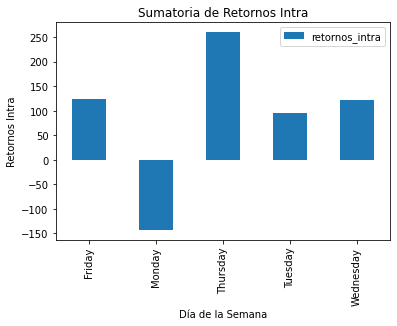

In [323]:
df_dia_intra2.plot.bar()
plt.title('Sumatoria de Retornos Intra')
plt.xlabel('Día de la Semana')
plt.ylabel('Retornos Intra')
plt.show()

In [50]:
df_sp500.head(10)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,date_day,retornos_gaps,retornos_intra
0,MMM,2000-01-03,48.03125,48.25000,47.03125,47.18750,26.434860,2173400.0,Monday,0.000000,-0.017723
1,MMM,2000-01-04,46.43750,47.40625,45.31250,45.31250,25.384466,2713800.0,Tuesday,-0.016022,-0.024524
2,MMM,2000-01-05,45.56250,48.12500,45.56250,46.62500,26.119738,3699400.0,Wednesday,0.005502,0.023052
3,MMM,2000-01-06,47.15625,51.25000,47.15625,50.37500,28.220531,5975800.0,Thursday,0.011330,0.066028
4,MMM,2000-01-07,50.56250,51.90625,49.96875,51.37500,28.780716,4101200.0,Friday,0.003715,0.015941
5,MMM,2000-01-10,50.21875,51.75000,50.00000,51.12500,28.640669,3863800.0,Monday,-0.022763,0.017885
6,MMM,2000-01-11,50.37500,51.25000,50.25000,50.25000,28.150492,2357600.0,Tuesday,-0.014779,-0.002484
7,MMM,2000-01-12,50.96875,51.81250,50.37500,50.37500,28.220531,2868400.0,Wednesday,0.014202,-0.011718
8,MMM,2000-01-13,50.65625,50.93750,50.18750,50.37500,28.220531,2244400.0,Thursday,0.005568,-0.005568
9,MMM,2000-01-14,50.37500,50.46875,49.46875,49.65625,27.817869,2541800.0,Friday,0.000000,-0.014371


**3. Cuales son las mejores industrias que pertenecen al SP500 en las cuales se puede invertir**

3.1. Se interactúa con un diccionario que posee como claves los **Tickers** y el **Sector** correspondiente como valor.

In [51]:
sym_sec_dict = {symbol_list[i] : sector_list[i] for i in range(0, len(symbol_list))}

In [52]:
sym_sec_dict

{'MMM': 'Industrials',
 'AOS': 'Industrials',
 'ABT': 'Health Care',
 'ABBV': 'Health Care',
 'ABMD': 'Health Care',
 'ACN': 'Information Technology',
 'ATVI': 'Communication Services',
 'ADM': 'Consumer Staples',
 'ADBE': 'Information Technology',
 'ADP': 'Information Technology',
 'AAP': 'Consumer Discretionary',
 'AES': 'Utilities',
 'AFL': 'Financials',
 'A': 'Health Care',
 'APD': 'Materials',
 'AKAM': 'Information Technology',
 'ALK': 'Industrials',
 'ALB': 'Materials',
 'ARE': 'Real Estate',
 'ALGN': 'Health Care',
 'ALLE': 'Industrials',
 'LNT': 'Utilities',
 'ALL': 'Financials',
 'GOOGL': 'Communication Services',
 'GOOG': 'Communication Services',
 'MO': 'Consumer Staples',
 'AMZN': 'Consumer Discretionary',
 'AMCR': 'Materials',
 'AMD': 'Information Technology',
 'AEE': 'Utilities',
 'AAL': 'Industrials',
 'AEP': 'Utilities',
 'AXP': 'Financials',
 'AIG': 'Financials',
 'AMT': 'Real Estate',
 'AWK': 'Utilities',
 'AMP': 'Financials',
 'ABC': 'Health Care',
 'AME': 'Industria

3.2. A partir de esos valores de nutre nuestro DataFrame con la columna **Sector**.

In [54]:
df_sp500['sector'] = df_sp500.Symbol.map(sym_sec_dict)

In [55]:
df_sp500.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,date_day,retornos_gaps,retornos_intra,sector
0,MMM,2000-01-03,48.03125,48.25000,47.03125,47.1875,26.434860,2173400.0,Monday,0.000000,-0.017723,Industrials
1,MMM,2000-01-04,46.43750,47.40625,45.31250,45.3125,25.384466,2713800.0,Tuesday,-0.016022,-0.024524,Industrials
2,MMM,2000-01-05,45.56250,48.12500,45.56250,46.6250,26.119738,3699400.0,Wednesday,0.005502,0.023052,Industrials
3,MMM,2000-01-06,47.15625,51.25000,47.15625,50.3750,28.220531,5975800.0,Thursday,0.011330,0.066028,Industrials
4,MMM,2000-01-07,50.56250,51.90625,49.96875,51.3750,28.780716,4101200.0,Friday,0.003715,0.015941,Industrials


3.3. Generamos la columna **variación** en funcion del Cierre Ajustado.  

In [56]:
variacion = df_sp500['Adj Close'].pct_change(1)
df_sp500.loc[df_sp500['Symbol'] == df_sp500['Symbol'].shift(1), 'variaciones'] = variacion
df_sp500['variaciones'] = df_sp500['variaciones'].fillna(0)

In [57]:
df_sp500.head(10)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,date_day,retornos_gaps,retornos_intra,sector,variaciones
0,MMM,2000-01-03,48.03125,48.25000,47.03125,47.18750,26.434860,2173400.0,Monday,0.000000,-0.017723,Industrials,0.000000
1,MMM,2000-01-04,46.43750,47.40625,45.31250,45.31250,25.384466,2713800.0,Tuesday,-0.016022,-0.024524,Industrials,-0.039735
2,MMM,2000-01-05,45.56250,48.12500,45.56250,46.62500,26.119738,3699400.0,Wednesday,0.005502,0.023052,Industrials,0.028965
3,MMM,2000-01-06,47.15625,51.25000,47.15625,50.37500,28.220531,5975800.0,Thursday,0.011330,0.066028,Industrials,0.080429
4,MMM,2000-01-07,50.56250,51.90625,49.96875,51.37500,28.780716,4101200.0,Friday,0.003715,0.015941,Industrials,0.019850
5,MMM,2000-01-10,50.21875,51.75000,50.00000,51.12500,28.640669,3863800.0,Monday,-0.022763,0.017885,Industrials,-0.004866
6,MMM,2000-01-11,50.37500,51.25000,50.25000,50.25000,28.150492,2357600.0,Tuesday,-0.014779,-0.002484,Industrials,-0.017115
7,MMM,2000-01-12,50.96875,51.81250,50.37500,50.37500,28.220531,2868400.0,Wednesday,0.014202,-0.011718,Industrials,0.002488
8,MMM,2000-01-13,50.65625,50.93750,50.18750,50.37500,28.220531,2244400.0,Thursday,0.005568,-0.005568,Industrials,0.000000
9,MMM,2000-01-14,50.37500,50.46875,49.46875,49.65625,27.817869,2541800.0,Friday,0.000000,-0.014371,Industrials,-0.014268


3.4. Generamos la columna **Volatilidad** en función de las variaciones. 

In [228]:
vix = df_sp500['variaciones'].rolling(252).std()*252**0.5
df_sp500.loc[df_sp500['Symbol'] == df_sp500['Symbol'].shift(1), 'vix'] = vix
df_sp500.vix = df_sp500.vix.fillna(0)

In [229]:
df_sp500.head(10)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,date_day,retornos_gaps,retornos_intra,sector,variaciones,vix,date_year,gaps_outlier
0,MMM,2000-01-03,48.03125,48.25000,47.03125,47.18750,26.434860,2173400.0,Monday,0.000000,-0.017723,Industrials,0.000000,0.0,2000,0
1,MMM,2000-01-04,46.43750,47.40625,45.31250,45.31250,25.384466,2713800.0,Tuesday,-0.016022,-0.024524,Industrials,-0.039735,0.0,2000,0
2,MMM,2000-01-05,45.56250,48.12500,45.56250,46.62500,26.119738,3699400.0,Wednesday,0.005502,0.023052,Industrials,0.028965,0.0,2000,0
3,MMM,2000-01-06,47.15625,51.25000,47.15625,50.37500,28.220531,5975800.0,Thursday,0.011330,0.066028,Industrials,0.080429,0.0,2000,0
4,MMM,2000-01-07,50.56250,51.90625,49.96875,51.37500,28.780716,4101200.0,Friday,0.003715,0.015941,Industrials,0.019850,0.0,2000,0
5,MMM,2000-01-10,50.21875,51.75000,50.00000,51.12500,28.640669,3863800.0,Monday,-0.022763,0.017885,Industrials,-0.004866,0.0,2000,0
6,MMM,2000-01-11,50.37500,51.25000,50.25000,50.25000,28.150492,2357600.0,Tuesday,-0.014779,-0.002484,Industrials,-0.017115,0.0,2000,0
7,MMM,2000-01-12,50.96875,51.81250,50.37500,50.37500,28.220531,2868400.0,Wednesday,0.014202,-0.011718,Industrials,0.002488,0.0,2000,0
8,MMM,2000-01-13,50.65625,50.93750,50.18750,50.37500,28.220531,2244400.0,Thursday,0.005568,-0.005568,Industrials,0.000000,0.0,2000,0
9,MMM,2000-01-14,50.37500,50.46875,49.46875,49.65625,27.817869,2541800.0,Friday,0.000000,-0.014371,Industrials,-0.014268,0.0,2000,0


3.5. A partir del indicador de **variación**, **volatilidad (vix)** y la columna **Sector**, podemos generar un DataFrame con la información filtrada a partir de la media.

In [339]:
df_var = df_sp500[['sector', 'vix', 'variaciones']].groupby([df_sp500.sector]).mean()
df_var['variaciones'] = df_var['variaciones'] * 1000
df_var['balance'] = df_var['vix'] / df_var['variaciones']
df_var = df_var.sort_values(by='balance', ascending=True)
df_var

,vix,variaciones,balance
sector,,,
Real Estate,0.308730,0.771389,0.400226
Health Care,0.332518,0.822288,0.404382
Consumer Discretionary,0.364750,0.878837,0.415037
Industrials,0.315675,0.743944,0.424327
Consumer Staples,0.242630,0.546185,0.444226
Information Technology,0.393827,0.886420,0.444290
Utilities,0.240229,0.531841,0.451692
Materials,0.325040,0.681348,0.477055
Financials,0.325490,0.675508,0.481845


Nota: El indicador de variacion es multiplicado por mil con en unico objetivo de mejorar la visualizacion comparativa a la volatilidad.
        Se mantiene la proporcionalidad y la relevancia del dato y se da a entender el porqué del orden de clasificación.

3.6. Visualizamos con la información filtrada el comparativo entre Variación y Volatilidad.

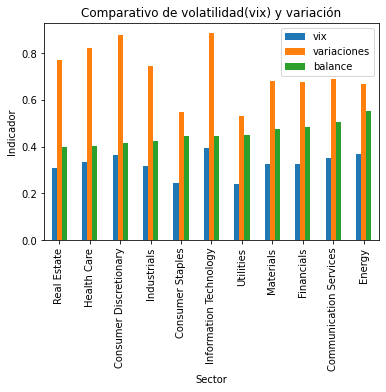

In [326]:
df_var.plot.bar()
plt.title('Comparativo de volatilidad(vix) y variación')
plt.xlabel('Sector')
plt.ylabel('Indicador')
plt.show()

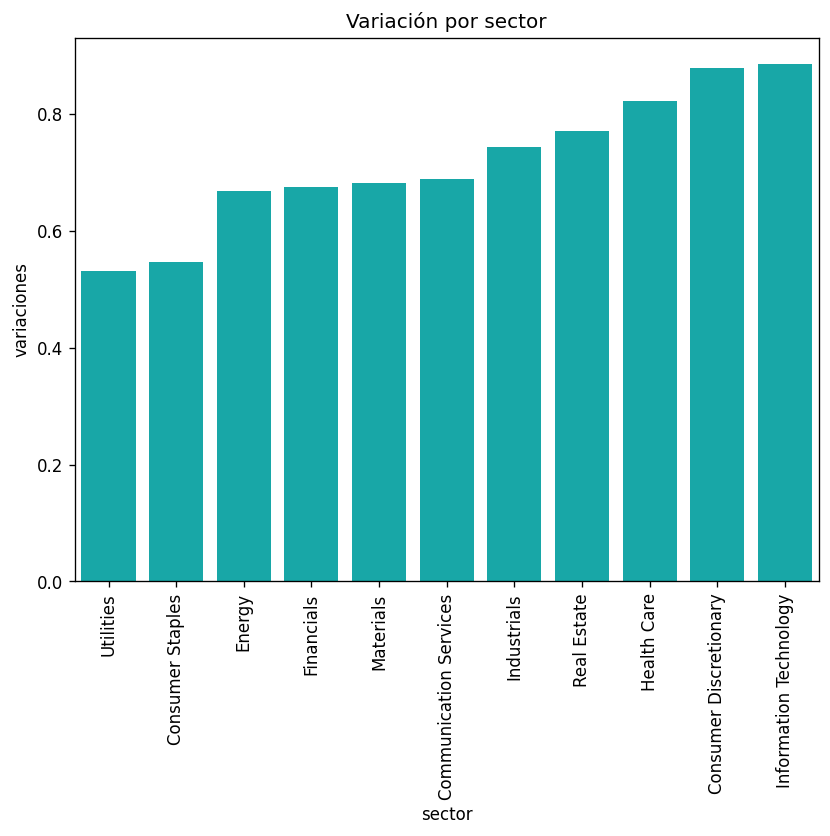

In [333]:
plt.figure(figsize=(8, 6), dpi=120)
sns.barplot(x=df_var.index, y=df_var.variaciones, data=df_var, color='c')
plt.title('Variación por sector')
plt.xticks(rotation=90)
plt.show()

* Clasificación de los Sectores en función de la Variación

3.7. Y a partir de ese top 10, observamos su **volatilidad**

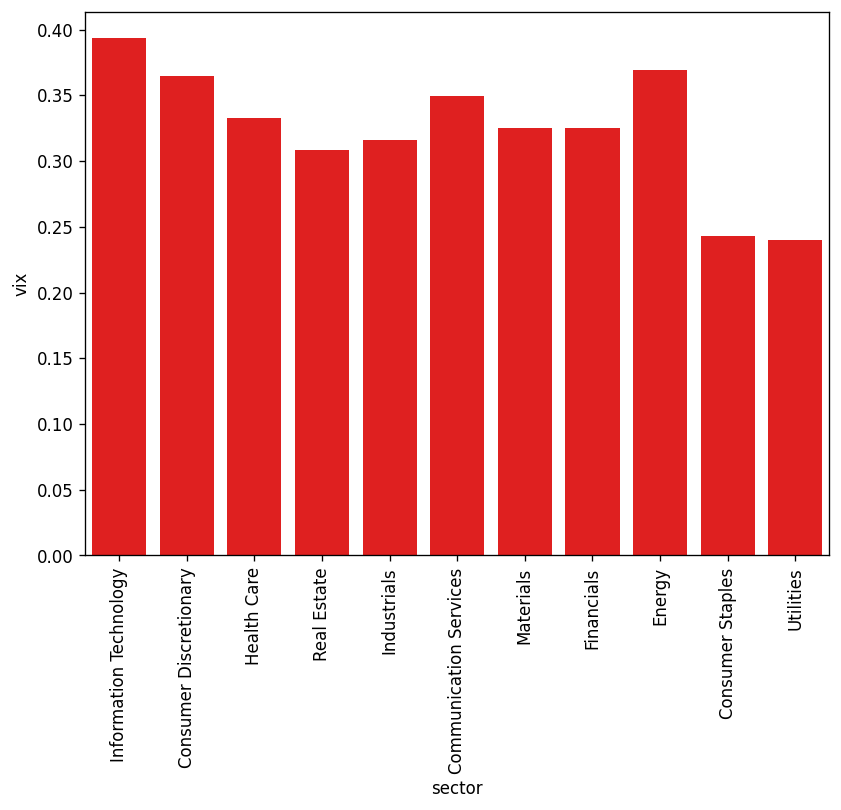

In [269]:
plt.figure(figsize=(8, 6), dpi=120)
sns.barplot(x=df_var.index, y=df_var.vix, data=df_var, color='r')
plt.xticks(rotation=90)
plt.show()

* En base a la clasificación por Variación, visualizamos su rendimiento en el indicador de Volatilidad.

* Conclusiones: 

    - La visualización refleja un contraste entre el crecimiento y la volatilidad (vix). El crecimiento en algunos casos trae con sigo la volatilidad y a lo largo de los años de estudio y en función de esta relación variación-volatilidad, se podría decir que **Real Estate o Inversión Inmobiliaria, es el mejor sector para invertir en el mediano plazo.** 

    - Y en ese orden:
    1. Real Estate
    2. Health Care
    3. Consumer Discretionary
    4. Industrials,
    5. Consumer Staples
    6. Information Technology
    7. Utilities
    8. Materials,
    9. Financials
    10. Communication Services
    11. Energy

**4. Cuales fueron los momentos de alta volatilidad que afectaron al SP500**

4.1. Generamos la columna correspondiente al año a traves de la fecha.

In [77]:
df_sp500['date_year'] = pd.to_datetime(df_sp500['Date']).dt.year

In [227]:
df_sp500.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume,date_day,retornos_gaps,retornos_intra,sector,variaciones,vix,date_year,gaps_outlier
0,MMM,2000-01-03,48.03125,48.25000,47.03125,47.1875,26.434860,2173400.0,Monday,0.000000,-0.017723,Industrials,0.000000,0.0,2000,0
1,MMM,2000-01-04,46.43750,47.40625,45.31250,45.3125,25.384466,2713800.0,Tuesday,-0.016022,-0.024524,Industrials,-0.039735,NaN,2000,0
2,MMM,2000-01-05,45.56250,48.12500,45.56250,46.6250,26.119738,3699400.0,Wednesday,0.005502,0.023052,Industrials,0.028965,NaN,2000,0
3,MMM,2000-01-06,47.15625,51.25000,47.15625,50.3750,28.220531,5975800.0,Thursday,0.011330,0.066028,Industrials,0.080429,NaN,2000,0
4,MMM,2000-01-07,50.56250,51.90625,49.96875,51.3750,28.780716,4101200.0,Friday,0.003715,0.015941,Industrials,0.019850,NaN,2000,0


4.2. Generamos un DataFrame apartir del año y filtramos la informacion correspondiente a la **volatilidad**.

In [342]:
df_vol_year = df_sp500[['date_year', 'vix']].groupby([df_sp500['date_year']]).sum()
df_vol_year = df_vol_year.iloc[1: , :]
df_vol_year

,date_year,vix
date_year,,
2000,188138000,41156.884856
2001,190038972,47189.409028
2002,197475278,42183.975625
2003,199797247,41524.850499
2004,203462112,28316.030820
2005,209073380,26840.049013
2006,213215734,27225.727158
2007,215899011,27604.438061
2008,220960320,43982.283329


4.3. Generamos la visualizacion correspondiente.

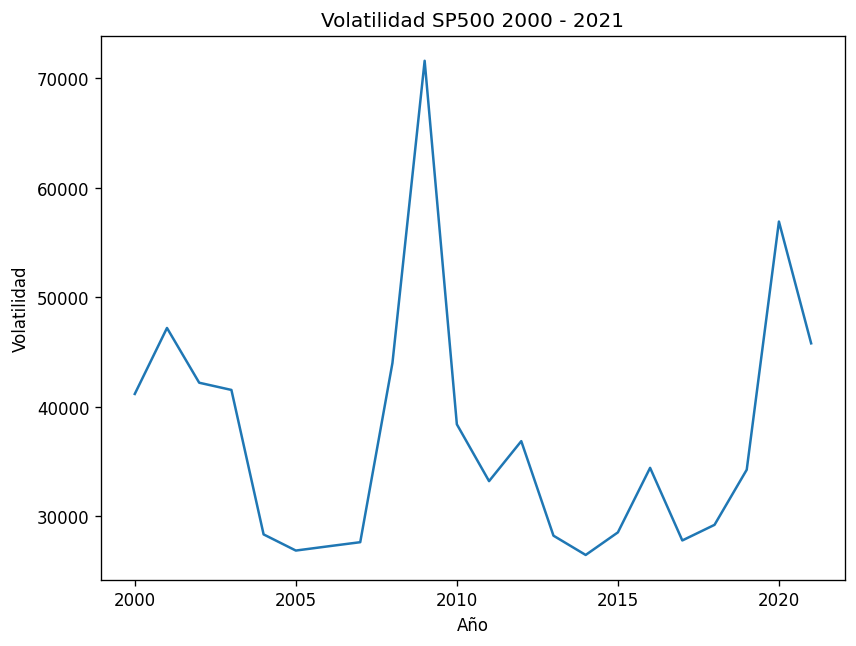

In [343]:
plt.figure(figsize=(8, 6), dpi=120)
sns.lineplot(x=df_vol_year.index, y=df_vol_year.vix, data=df_vol_year)
plt.title('Volatilidad SP500 2000 - 2021')
plt.xlabel('Año')
plt.ylabel('Volatilidad')
plt.show()

* Conclusion:

    - Los momentos de alta volatilidad que afectaron al SP500 desde el año 2000 al 2021, fueron:
    
        1. En el año **2001**, volatilidad relacionada con la llamada *'crisis del punto com'*.
        2. En el año **2008**, alta volatilidad relacionada con la crisis financiera provocada por los grandes bancos en América y Europa.
        3. En el año **2020**, la más reciente que está relacionada con la crisis generada por la pandemia del coronavirus.

**5. Cuales son las 9 mejores empresas para invertir**

5.1. Generamos un DataFrame filtrando la informacion correspondiente a la variacion y volatilidad en funcion del **Ticker(Empresa)**

In [336]:
df_var_ticker = df_sp500[['Symbol', 'vix', 'variaciones']].groupby([df_sp500.Symbol]).mean()
df_var_ticker['variaciones'] = df_var_ticker['variaciones'] * 1000
df_var_ticker['balance'] = df_var_ticker['vix'] / df_var_ticker['variaciones']
df_var_ticker = df_var_ticker.nlargest(n=9, columns='variaciones')
df_var_ticker = df_var_ticker.sort_values(by='variaciones', ascending=True)
df_var_ticker

,vix,variaciones,balance
Symbol,,,
ETSY,0.571445,1.885454,0.303081
NFLX,0.541259,1.897209,0.285292
PAYC,0.437243,2.111214,0.207105
SEDG,0.607268,2.323690,0.261338
CZR,0.524414,2.414748,0.217171
TSLA,0.539270,2.490883,0.216498
ENPH,0.813963,2.707280,0.300657
CARR,0.503193,3.797051,0.132522
MRNA,0.724769,4.704353,0.154064


Nota: El indicador de variacion es multiplicado por mil con en unico objetivo de mejorar la visualizacion comparativa a la volatilidad.
        Se mantiene la proporcionalidad y la relevancia del dato y se da a entender el porqué del orden de clasificación.

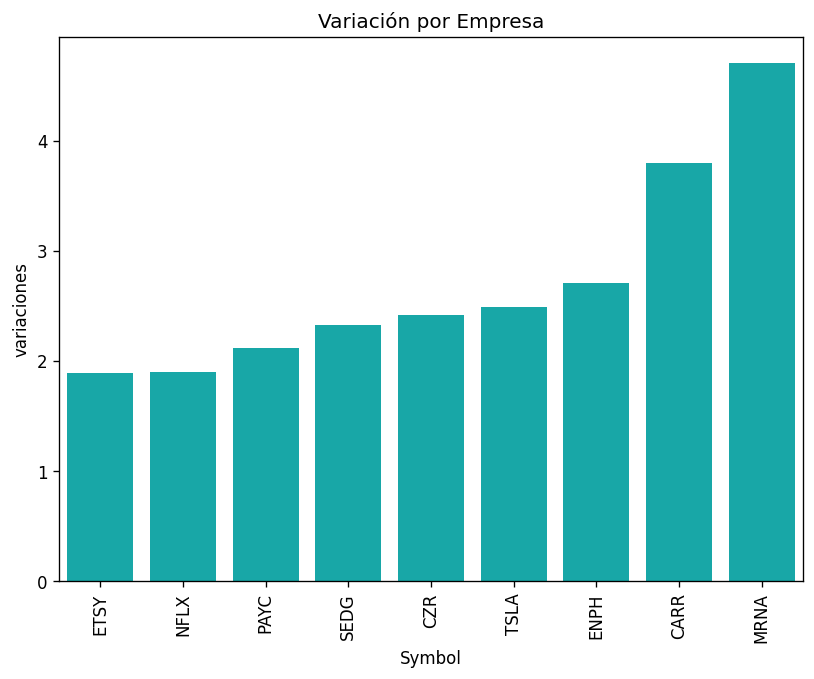

In [337]:
plt.figure(figsize=(8, 6), dpi=120)
sns.barplot(x=df_var_ticker.index, y=df_var_ticker.variaciones, data=df_var_ticker, color='c')
plt.title('Variación por Empresa')
plt.xticks(rotation=90)
plt.show()

* Clasificación de las Empresas en función de la Variación

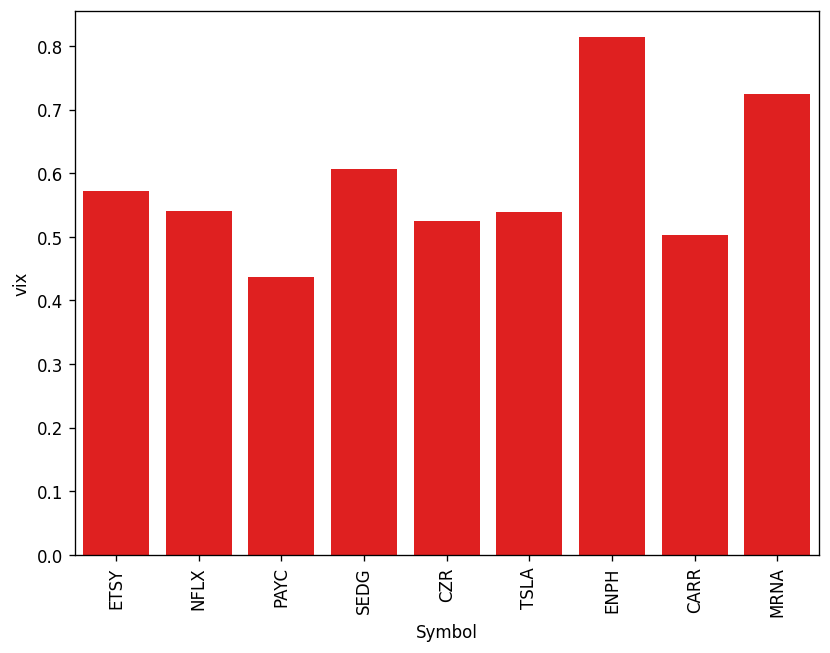

In [338]:
plt.figure(figsize=(8, 6), dpi=120)
sns.barplot(x=df_var_ticker.index, y=df_var_ticker.vix, data=df_var_ticker, color='r')
plt.xticks(rotation=90)
plt.show()

* En base a la clasificación por Variación, visualizamos su rendimiento en el indicador de Volatilidad.

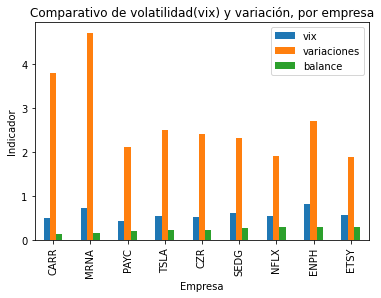

In [328]:
df_var_ticker.plot.bar()
plt.title('Comparativo de volatilidad(vix) y variación, por empresa')
plt.xlabel('Empresa')
plt.ylabel('Indicador')
plt.show()

* Conclusion:

    - Esta visualización se organizó a partir del balance que es un indicador de la participación de la volatilidad dentro del crecimiento, por esta razón, a pesar de que una empresa como **Moderna Inc.** sea la que más rentabilidad podría llegar a generar, también se puede notar que tiene una mayor volatilidad respecto a **Carrier**, la Americana de electrodomésticos que maneja un mejor balance.

    - Top 9 - mejores empresas para invertir:
    1. CARR - Carrier  
    2. MRNA - Moderna Inc.
    3. PAYC - Paycom Software Inc.
    4. TSLA - Tesla, Inc.
    5. CZR - Caesars Entertainment Inc
    6. SEDG - SolarEdge
    7. NFLX - Netflix
    8. ENPH - Enphase Energy
    9. ETSY - Etsy es una empresa estadounidense dedicada al comercio electrónico.
     